# FTSE 100 stocks data collection and Exploratory Data Analysis

## 1. Introduction

Historical stock market data from Yahoo! Finance will be collected, analysed, transformed and visualised to gain insights into the stock returns for a selection of FTSE 100 companies from 2010-2019, as well as looking at the FTSE 100 Index itself.

## 2. Install/import libraries

In [51]:
%pip install yfinance mplfinance

Note: you may need to restart the kernel to use updated packages.


In [52]:
import yfinance as yf

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.patches as mpatches
from matplotlib.dates import date2num, DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from mplfinance.original_flavor import candlestick_ohlc
import seaborn as sns

import datetime
from datetime import date, timedelta

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

## 3. Data collection

Download FTSE 100 stock data from Yahoo! Finance using yfinance library and store in a pandas dataframe. The stocks chosen are ULVR.L (Unilever), RSDB.L (Royal Dutch Shell), GSK.L (GlaxoSmithKline), AZN.L (AstraZeneca), HSBA.L (HSBC) and BP.L (BP) representing a selection of different industries - pharmaceuticals, oil and finance.

In [53]:
ftse100_stocks = yf.download("AZN.L GSK.L ULVR.L BP.L RDSB.L HSBA.L", start=datetime.datetime(2010, 1, 1), 
                                     end=datetime.datetime(2019, 12, 31), group_by='tickers')
ftse100_stocks.head(10)

$RDSB.L: possibly delisted; no timezone found
[*********************100%***********************]  6 of 6 completed

1 Failed download:
['RDSB.L']: possibly delisted; no timezone found


Ticker     RDSB.L                                        GSK.L               \
Price        Open High Low Close Adj Close Volume         Open         High   
Date                                                                          
2010-01-04    NaN  NaN NaN   NaN       NaN    NaN  1321.913172  1336.379272   
2010-01-05    NaN  NaN NaN   NaN       NaN    NaN  1337.875826  1337.875826   
2010-01-06    NaN  NaN NaN   NaN       NaN    NaN  1302.458668  1315.927254   
2010-01-07    NaN  NaN NaN   NaN       NaN    NaN  1294.975693  1303.954666   
2010-01-08    NaN  NaN NaN   NaN       NaN    NaN  1290.486450  1297.470151   
2010-01-11    NaN  NaN NaN   NaN       NaN    NaN  1283.502446  1291.483782   
2010-01-12    NaN  NaN NaN   NaN       NaN    NaN  1282.504899  1297.470058   
2010-01-13    NaN  NaN NaN   NaN       NaN    NaN  1286.994333  1295.973428   
2010-01-14    NaN  NaN NaN   NaN       NaN    NaN  1271.032132  1294.477455   
2010-01-15    NaN  NaN NaN   NaN       NaN    NaN  1275.521641  1280.509948   

Ticker                                ...      HSBA.L                          \
Price               Low        Close  ...        Open        High         Low   
Date                                  ...                                       
2010-01-04  1315.428168  1336.379272  ...  707.534909  720.628235  707.237345   
2010-01-05  1300.463226  1303.954956  ...  717.156427  741.160846  717.156427   
2010-01-06  1291.484296  1292.481934  ...  731.142517  737.986773  728.265992   
2010-01-07  1285.996719  1290.486206  ...  729.158654  736.399702  724.199066   
2010-01-08  1274.024834  1278.015503  ...  734.217500  736.498898  723.108009   
2010-01-11  1278.015202  1284.998901  ...  734.614094  740.069640  722.314353   
2010-01-12  1279.013169  1286.994507  ...  727.373239  728.960343  714.676704   
2010-01-13  1267.539810  1272.029297  ...  713.585442  718.644197  708.328231   
2010-01-14  1263.050913  1280.011230  ...  714.973996  717.156226  706.046740   
2010-01-15  1243.596161  1247.088013  ...  712.692826  720.925730  694.044786   

Ticker                                 ULVR.L                            \
Price            Close    Volume         Open         High          Low   
Date                                                                      
2010-01-04  720.628235  15139314  2112.804067  2133.006928  2106.424178   
2010-01-05  731.043274  27480532  2115.994393  2123.437720  2064.955511   
2010-01-06  734.415894  17203196  2066.018540  2078.778320  2057.512020   
2010-01-07  730.547363  26192632  2071.335516  2085.158736  2047.942580   
2010-01-08  734.019104  20725091  2063.892381  2071.335467  2038.372815   
2010-01-11  724.099792  21133364  2071.335231  2077.715122  2050.069170   
2010-01-12  722.512878  21007564  2055.386319  2060.702775  2033.056693   
2010-01-13  711.899170  23332228  2036.246233  2066.019061  2033.056287   
2010-01-14  708.824097  19050126  2067.082559  2078.779151  2053.259580   
2010-01-15  696.822144  69870520  2054.322471  2062.828994  2046.879386   

Ticker                            
Price             Close   Volume  
Date                              
2010-01-04  2122.373779  1649773  
2010-01-05  2076.651855  2154892  
2010-01-06  2078.778320  2519864  
2010-01-07  2053.259277  2951063  
2010-01-08  2058.575684  1771076  
2010-01-11  2052.195801  1162472  
2010-01-12  2051.133057  1307564  
2010-01-13  2053.259277  2148012  
2010-01-14  2068.145996  1867847  
2010-01-15  2053.259277  3785292  

[10 rows x 31 columns]

## 4. Exploratory Data Analysis

In [54]:
# Descriptive statistics showing distribution of the data

ftse100_stocks.describe()

Ticker RDSB.L                                         GSK.L               \
Price    Open High  Low Close Adj Close Volume         Open         High   
count     0.0  0.0  0.0   0.0       0.0    0.0  2525.000000  2525.000000   
mean      NaN  NaN  NaN   NaN       NaN    NaN  1464.899829  1477.475574   
std       NaN  NaN  NaN   NaN       NaN    NaN   152.873644   154.007713   
min       NaN  NaN  NaN   NaN       NaN    NaN  1097.307535  1111.778862   
25%       NaN  NaN  NaN   NaN       NaN    NaN  1352.113972  1365.132797   
50%       NaN  NaN  NaN   NaN       NaN    NaN  1463.068009  1475.366836   
75%       NaN  NaN  NaN   NaN       NaN    NaN  1586.796642  1599.071555   
max       NaN  NaN  NaN   NaN       NaN    NaN  1817.430587  1858.407042   

Ticker                            ...       HSBA.L                            \
Price           Low        Close  ...         Open         High          Low   
count   2525.000000  2525.000000  ...  2525.000000  2525.000000  2525.000000   
mean    1452.789586  1464.933375  ...   623.510843   628.700764   617.889786   
std      152.434527   153.167279  ...    76.658358    76.663508    77.010004   
min     1085.830486  1092.816650  ...   415.264697   418.149886   390.431338   
25%     1340.257664  1352.658325  ...   577.832686   581.869431   572.841208   
50%     1450.542242  1464.035034  ...   634.987349   639.700953   628.932995   
75%     1574.644426  1586.187134  ...   674.587909   680.469729   669.619752   
max     1813.814939  1826.670532  ...   792.723450   795.312723   787.246089   

Ticker                                  ULVR.L                            \
Price         Close        Volume         Open         High          Low   
count   2525.000000  2.525000e+03  2525.000000  2525.000000  2525.000000   
mean     623.155795  2.676188e+07  3205.214058  3230.673049  3180.267269   
std       76.779258  1.244700e+07  1006.906522  1014.141071  1000.371886   
min      414.020966  0.000000e+00  1795.416138  1801.797835  1767.761590   
25%      578.109741  1.903663e+07  2296.494991  2312.457795  2278.403381   
50%      634.343933  2.412342e+07  2932.313838  2958.108652  2906.741302   
75%      674.629395  3.142940e+07  4256.888273  4284.215921  4211.703095   
max      792.723450  1.526299e+08  5690.392087  5690.392087  5616.769038   

Ticker                             
Price         Close        Volume  
count   2525.000000  2.525000e+03  
mean    3205.921691  2.462071e+06  
std     1007.271156  1.118430e+06  
min     1795.416138  0.000000e+00  
25%     2293.749023  1.778822e+06  
50%     2934.451416  2.250248e+06  
75%     4252.255859  2.875430e+06  
max     5680.790039  1.987094e+07  

[8 rows x 31 columns]

In [55]:
# Concise summary of the dataframe to check for missing values and data types

ftse100_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2525 entries, 2010-01-04 to 2019-12-30
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (RDSB.L, Open)       0 non-null      float64
 1   (RDSB.L, High)       0 non-null      float64
 2   (RDSB.L, Low)        0 non-null      float64
 3   (RDSB.L, Close)      0 non-null      float64
 4   (RDSB.L, Adj Close)  0 non-null      float64
 5   (RDSB.L, Volume)     0 non-null      float64
 6   (GSK.L, Open)        2525 non-null   float64
 7   (GSK.L, High)        2525 non-null   float64
 8   (GSK.L, Low)         2525 non-null   float64
 9   (GSK.L, Close)       2525 non-null   float64
 10  (GSK.L, Volume)      2525 non-null   int64  
 11  (BP.L, Open)         2525 non-null   float64
 12  (BP.L, High)         2525 non-null   float64
 13  (BP.L, Low)          2525 non-null   float64
 14  (BP.L, Close)        2525 non-null   float64
 15  (BP.L, Volume)      

In [56]:
# Number of rows indicates number of trading days

ftse100_stocks.shape

(2525, 31)

We will use the Adjusted Close price to take into account all corporate actions, such as stock splits and dividends, to give a more accurate reflection of the true value of the stock and present a coherent picture of returns.

In [57]:
# Dataframe to contain Adjusted Close price for each company's stock

adj_close = pd.DataFrame()

In [58]:
tickers = ['AZN.L', 'GSK.L', 'ULVR.L', 'BP.L', 'GSK.L', 'HSBA.L']
for ticker in tickers:
    if ticker in ftse100_stocks.columns.get_level_values(0):
        # Try 'Adj Close' first, then fall back to 'Close'
        if ('Adj Close' if (ticker, 'Adj Close') in ftse100_stocks.columns else 'Close') is not None:
            try:
                adj_close[ticker] = ftse100_stocks[(ticker, 'Adj Close')]
            except (KeyError, TypeError):
                try:
                    adj_close[ticker] = ftse100_stocks[(ticker, 'Close')]
                except (KeyError, TypeError):
                    pass

adj_close

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
Date,,,,,
2010-01-04,2923.060303,1336.379272,2122.373779,608.424316,720.628235
2010-01-05,2889.764893,1303.954956,2076.651855,614.869568,731.043274
2010-01-06,2857.463867,1292.481934,2078.778320,614.175476,734.415894
2010-01-07,2892.747070,1290.486206,2053.259277,618.042542,730.547363
2010-01-08,2890.758789,1278.015503,2058.575684,616.455811,734.019104
...,...,...,...,...,...
2019-12-20,7796.951172,1821.046143,4660.032227,483.463074,598.420288
2019-12-23,7735.038086,1822.853760,4726.193359,487.450043,597.223572
2019-12-24,7703.084473,1825.465210,4684.042480,486.104431,597.622437


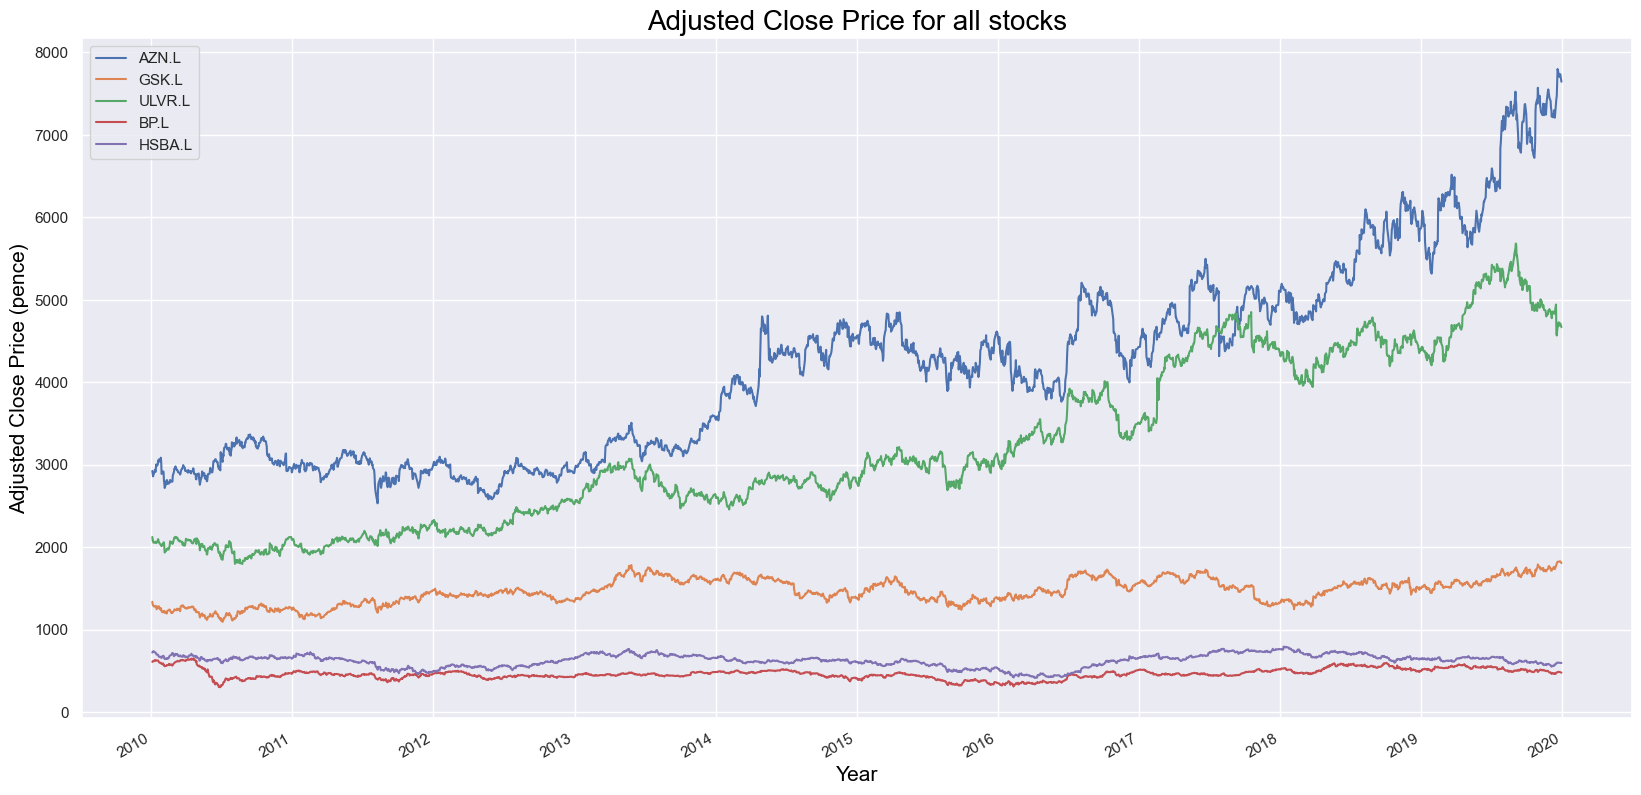

In [59]:
# Plot Adjusted Close price for all stocks

adj_close.plot(grid = True)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Adjusted Close Price for all stocks', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Adjusted Close Price (pence)', color = 'black', fontsize = 15);

This chart shows the absolute price rather than relative change which we are more concerned with when trading. AZN.L and ULVR.L stocks are far more expensive than BP.L and HSBA.L making the latter appear much less volatile than they truly are. 

In [60]:
# lambda function to calculate min and max Adjusted Close price 

adj_close_min_max = adj_close.apply(lambda x: pd.Series([x.min(), x.max()], 
                              index=['min', 'max']))

adj_close_min_max

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
min,2530.667969,1092.816650,1795.416138,300.389435,414.020966
max,7796.951172,1826.670532,5680.790039,649.967651,792.723450


One solution would be to use two different scales when plotting the data. One scale will be used by the BP.L and HSBA.L stocks, and the other by the more expensive stocks.

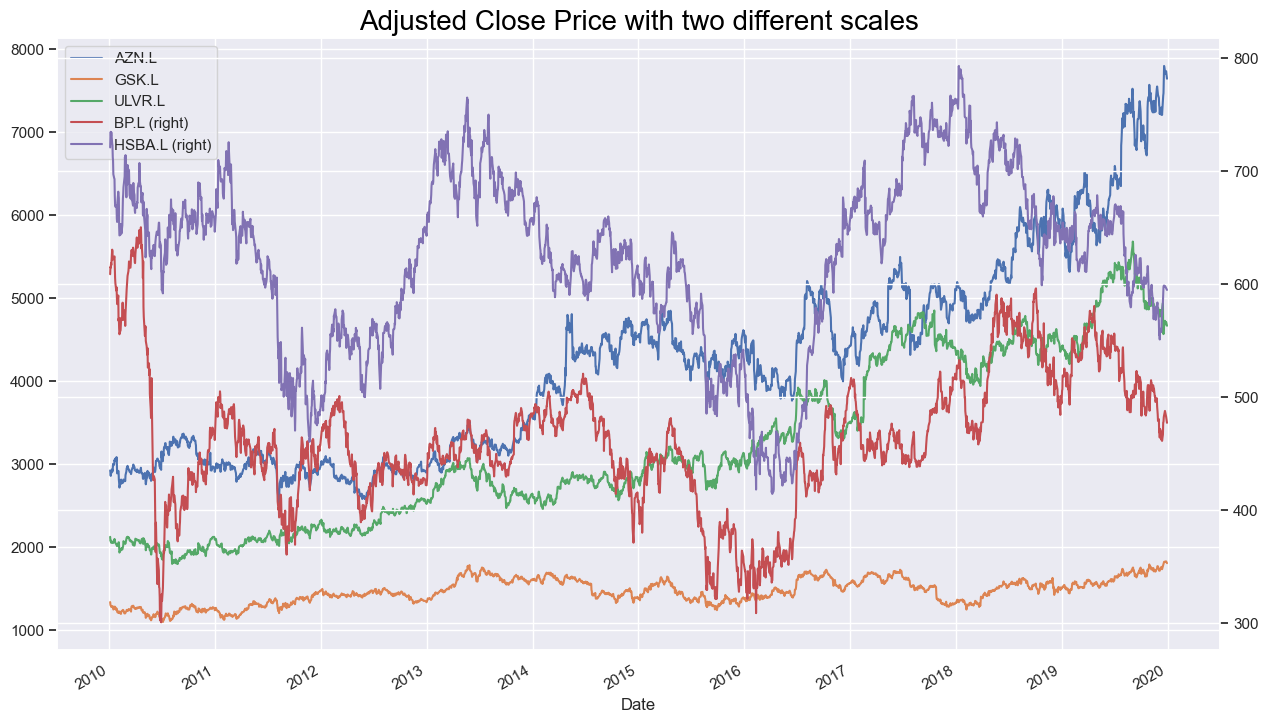

In [61]:
# Plot BP.L and HSBA.L data on a secondary y-axis

adj_close.plot(secondary_y = ["BP.L", "HSBA.L"], grid = True)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Adjusted Close Price with two different scales', color = 'black', fontsize = 20);

## 5. Data transformation

A better solution would be to plot the stocks' returns, which requires transforming the data into something more useful for our purposes.




### 5.1 Consider stocks' returns since beginning of the time period

One transformation is to plot $return_{t,0}$  = $\frac{price_t}{price_0}$ by applying a lambda function to each column in the adj_close dataframe and return a dataframe with the result.

In [62]:
# Transform data using lambda function to plot stocks' returns

returns_lambda = adj_close.apply(lambda x: x / x[0])
returns_lambda.head()

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
Date,,,,,
2010-01-04,1.000000,1.000000,1.000000,1.000000,1.000000
2010-01-05,0.988609,0.975737,0.978457,1.010593,1.014453
2010-01-06,0.977559,0.967152,0.979459,1.009453,1.019133
2010-01-07,0.989630,0.965659,0.967435,1.015808,1.013765
2010-01-08,0.988949,0.956327,0.969940,1.013200,1.018582


Plot $return_{t,0}$  = $\frac{price_t}{price_0}$ with transformed data

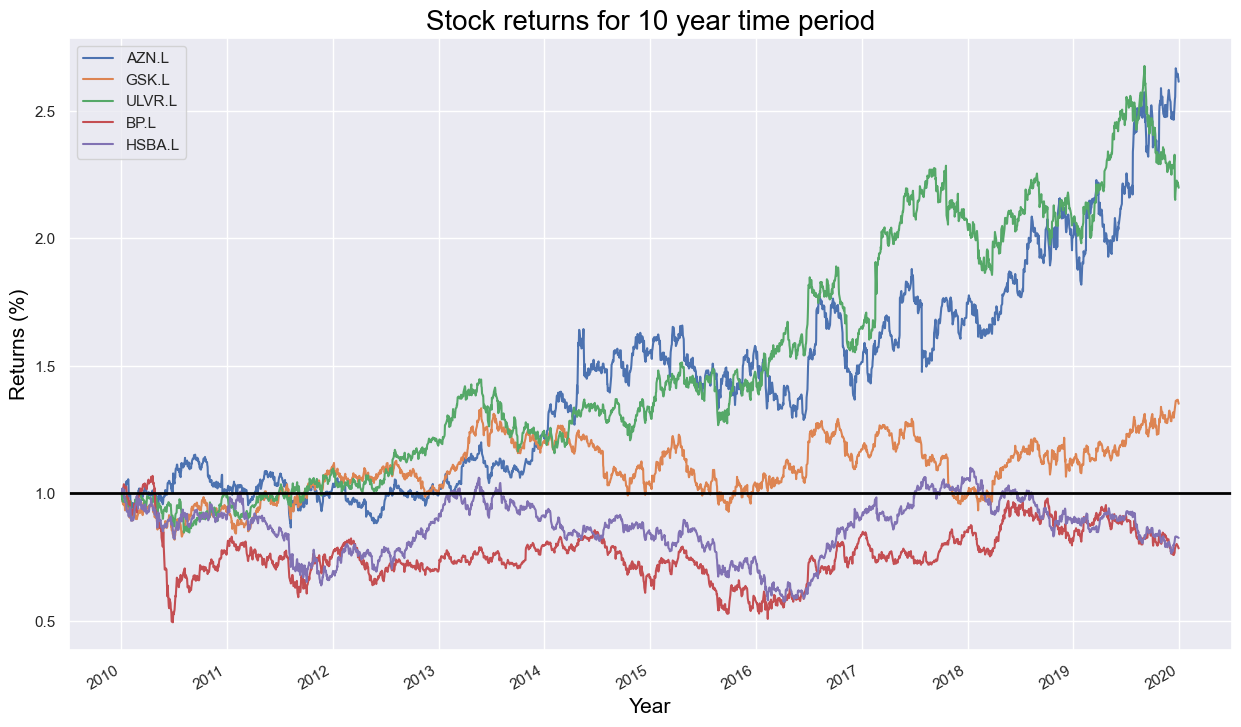

In [63]:
# Plot to show how profitable each stock was throughout the time period

returns_lambda.plot(grid = True).axhline(y = 1, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Stock returns for 10 year time period', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Returns (%)', color = 'black', fontsize = 15);

This plot is more useful than the previous one as we can see how profitable each stock was since the beginning of the period and which are most closely correlated. The overall trend of the stocks is much more apparent.

In [64]:
# Create dataframe to contain returns for each company's stock to plot the change of each stock per day

returns = pd.DataFrame()

### 5.2 Percentage change

Another transformation is to calculate the daily percentage change directly using the pandas **'pct_change()'** method which computes the percentage change from the previous row by default.

This can be represented with the formula $increase_{t}$  = $\frac{price_t - price_{t-1}}{price_t}$ 





In [65]:
# pandas pct_change() method on the Adj Close column to create a column representing return value

tickers = ['AZN.L', 'GSK.L', 'ULVR.L', 'BP.L', 'RDSB.L', 'HSBA.L']
for ticker in tickers:
    if ticker in ftse100_stocks.columns.get_level_values(0):
        try:
            returns[ticker] = ftse100_stocks[(ticker, 'Adj Close')].pct_change() * 100
        except (KeyError, TypeError):
            try:
                returns[ticker] = ftse100_stocks[(ticker, 'Close')].pct_change() * 100
            except (KeyError, TypeError):
                pass

returns

,AZN.L,GSK.L,ULVR.L,BP.L,RDSB.L,HSBA.L
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-1.139060,-2.426281,-2.154282,1.059335,NaN,1.445272
2010-01-06,-1.117773,-0.879863,0.102399,-0.112884,NaN,0.461343
2010-01-07,1.234773,-0.154410,-1.227598,0.629635,NaN,-0.526749
2010-01-08,-0.068733,-0.966357,0.258925,-0.256735,NaN,0.475225
...,...,...,...,...,...,...
2019-12-20,2.279272,0.376435,0.714954,0.289446,NaN,0.033353
2019-12-23,-0.794068,0.099263,1.419757,0.824669,NaN,-0.199979
2019-12-24,-0.413102,0.143262,-0.891857,-0.276051,NaN,0.066787


In [66]:
# Clean up the data by dropping the first value which becomes a 'NaN' as there is no price change from the day before.

returns.dropna(inplace=True)
returns.head()

,AZN.L,GSK.L,ULVR.L,BP.L,RDSB.L,HSBA.L
Date,,,,,,


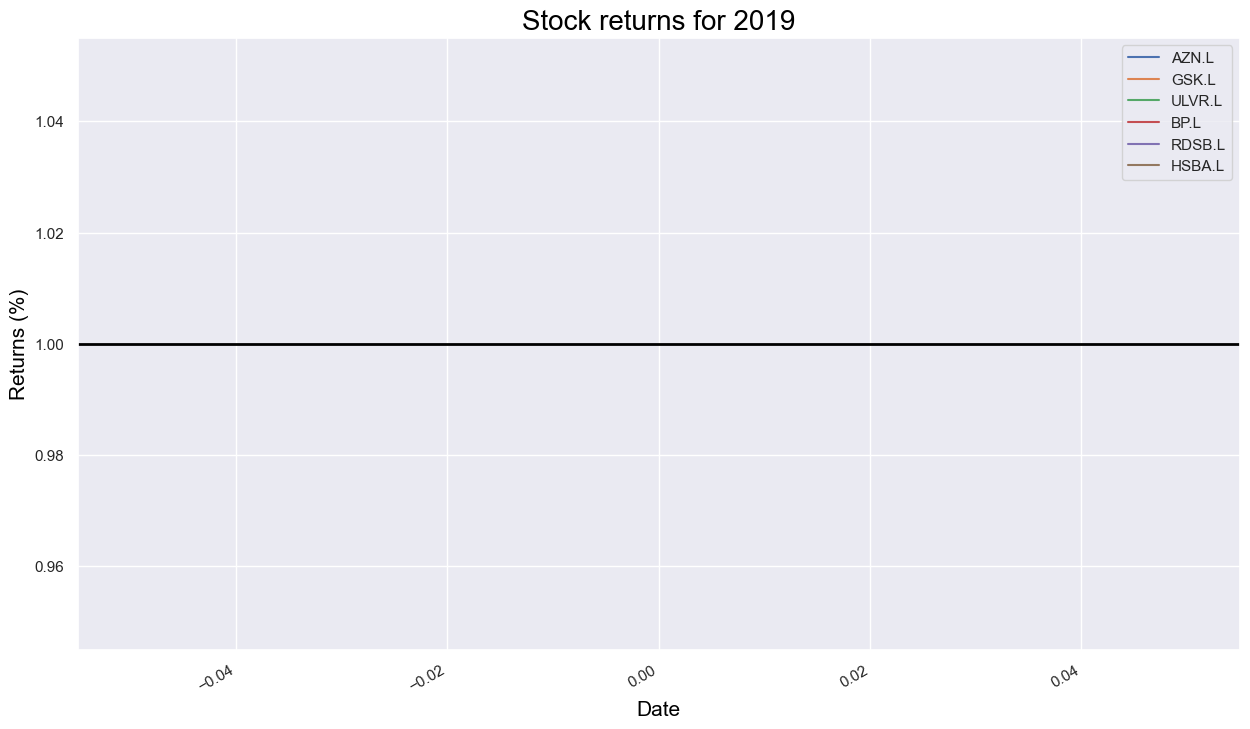

In [67]:
# Plot returns for 2019

returns.loc['2019-01-01':'2019-12-31'].plot(grid = True).axhline(y = 1, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Stock returns for 2019', color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('Returns (%)', color = 'black', fontsize = 15);

The above plot for 2019 shows changes between days, which is what more advanced methods consider when modelling stock behaviour.

### 5.3 Log differences

Another way to model the growth of a stock is with log differences. Taking the natural log of the prices will give an approximation to the true daily returns.

This can be represented with the formula $change_{t}$  = $log (price_{t}) - log (price_{t-1})$ 

Using logs, or summarising changes in terms of continuous compounding, has a number of advantages over looking at simple percent changes. For example, if your portfolio goes up by 50% (say from £100 to £150) and then declines by 50% (say from £150 to £75), you’re not back where you started. If you calculate your average percentage return (in this case, 0%), that’s not a particularly useful summary of the fact that you actually ended up 25% below where you started. 

By contrast, if your portfolio goes up in logarithmic terms by 0.5, and then falls in logarithmic terms by 0.5, you are exactly back where you started. The average log return on your portfolio is exactly the same number as the change in log price between the time you bought it and the time you sold it, divided by the number of years that you held it.


In [68]:
# Use numpy's log function to obtain and plot the log differences of the adjusted price data

stock_change = adj_close.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.

stock_change.head()

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.011456,-0.024562,-0.021778,0.010538,0.014349
2010-01-06,-0.011241,-0.008838,0.001023,-0.001129,0.004603
2010-01-07,0.012272,-0.001545,-0.012352,0.006277,-0.005281
2010-01-08,-0.000688,-0.009711,0.002586,-0.002571,0.004741


In [69]:
# Clean up the data by dropping NaNs

stock_change.dropna(inplace=True)
stock_change.head()

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
Date,,,,,
2010-01-05,-0.011456,-0.024562,-0.021778,0.010538,0.014349
2010-01-06,-0.011241,-0.008838,0.001023,-0.001129,0.004603
2010-01-07,0.012272,-0.001545,-0.012352,0.006277,-0.005281
2010-01-08,-0.000688,-0.009711,0.002586,-0.002571,0.004741
2010-01-11,0.015861,0.005449,-0.003104,0.021955,-0.013606


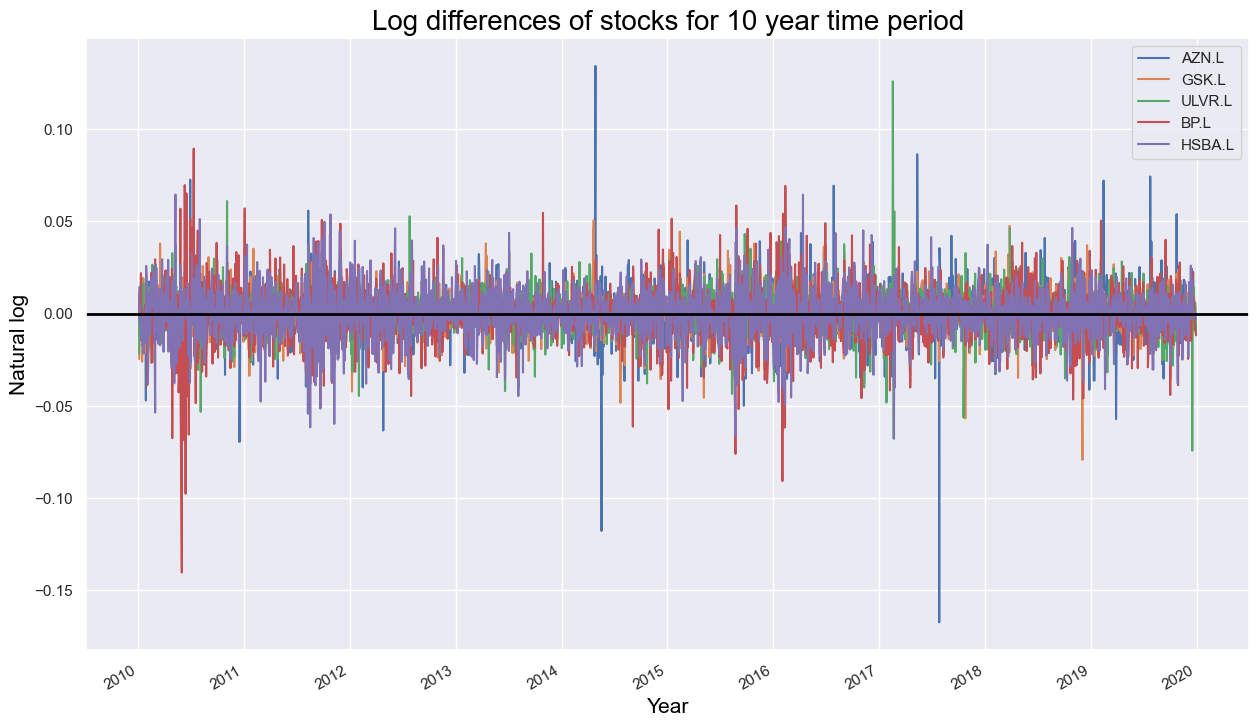

In [70]:
# Plot log differences for 2010-2019

stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Log differences of stocks for 10 year time period', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Natural log', color = 'black', fontsize = 15);

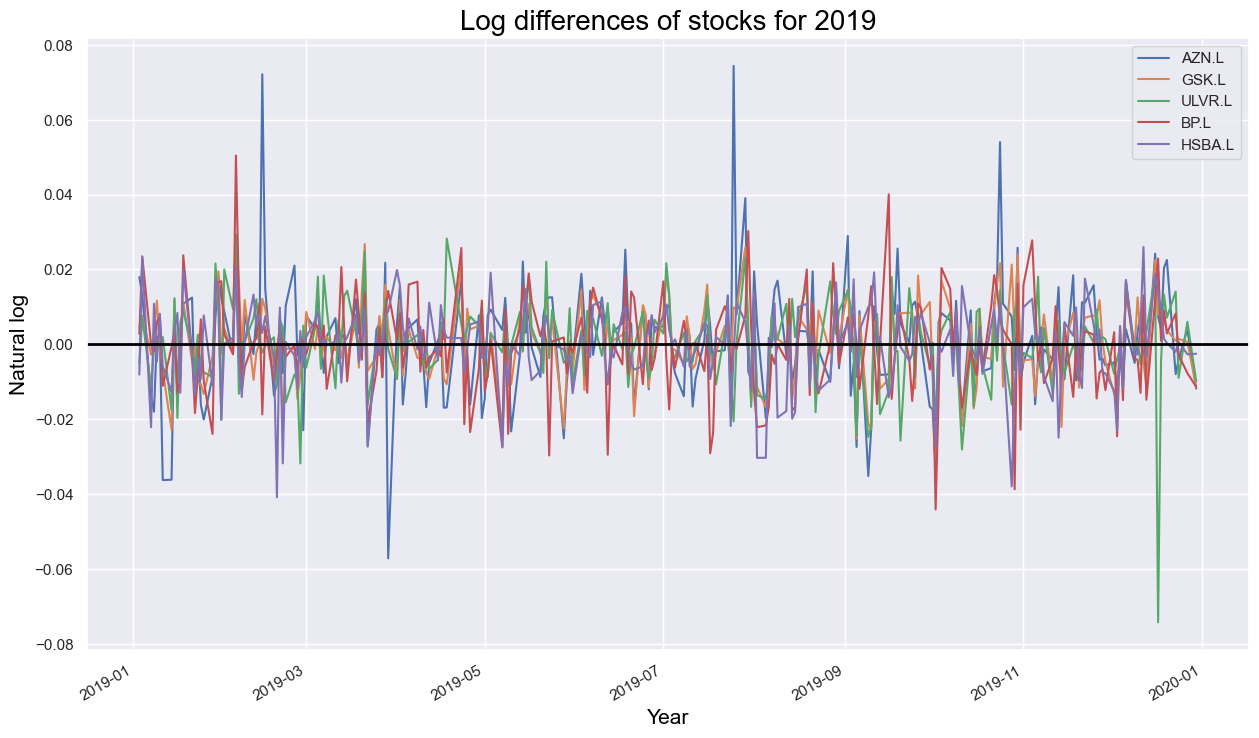

In [71]:
# Plot log differences for 2019

stock_change.loc['2019-01-01':'2019-12-31'][1:].plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Log differences of stocks for 2019', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Natural log', color = 'black', fontsize = 15);

### 5.4 Annualise returns

We can annualise our returns, thus computing the annual percentage rate (APR). This helps us keep returns on a common time scale.

In [72]:
# annualise returns

stock_change_apr = stock_change * 252 * 100    # There are 252 trading days in a year; the 100 converts to percentages

stock_change_apr

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
Date,,,,,
2010-01-05,-288.690433,-618.962435,-548.812091,265.548356,361.601762
2010-01-06,-283.265012,-222.706779,25.791274,-28.462936,115.991174
2010-01-07,309.257482,-38.941513,-311.269220,158.170660,-133.091651
2010-01-08,-17.326753,-244.706233,65.164830,-64.780390,119.472939
2010-01-11,399.696763,137.324297,-78.220439,553.271150,-342.867111
...,...,...,...,...,...
2019-12-20,567.928556,94.683503,179.527349,72.834976,8.403527
2019-12-23,-200.903825,25.001761,355.262751,206.964314,-50.445224
2019-12-24,-104.317374,36.076098,-225.756138,-69.661091,16.824581


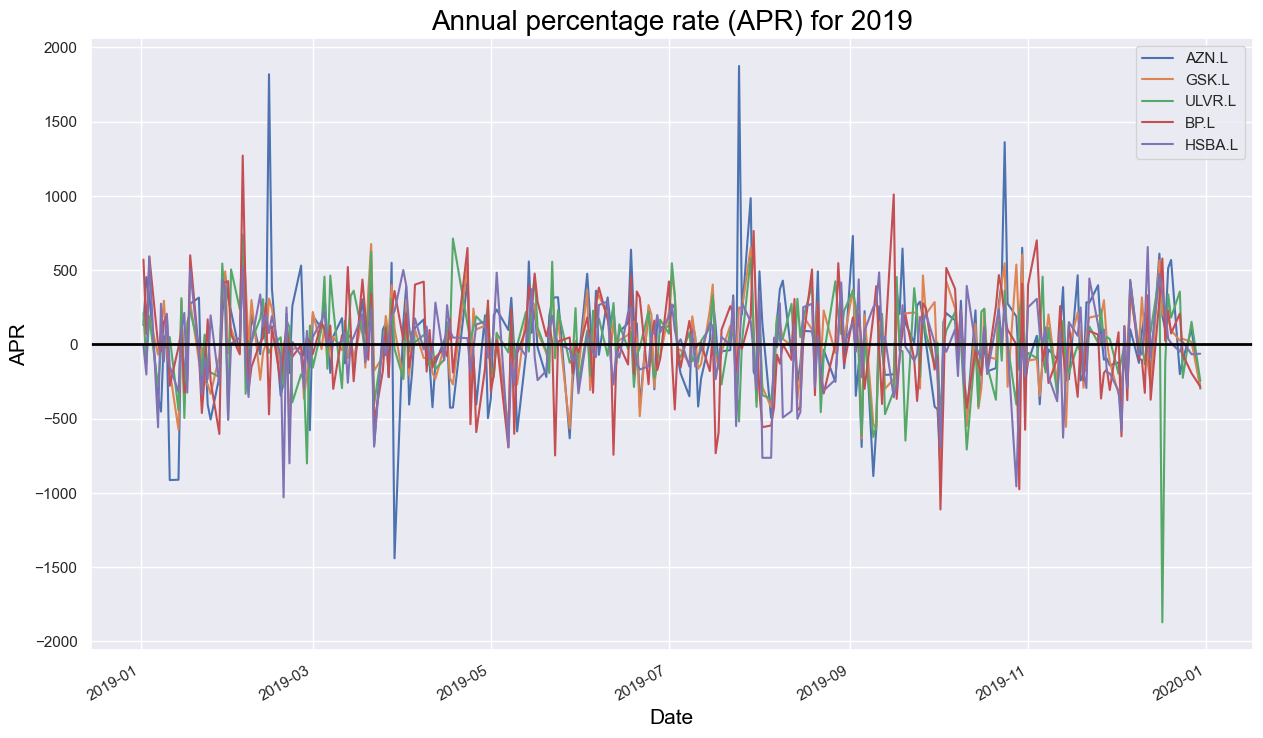

In [73]:
# Plot annualised returns for 2019

stock_change_apr['2019-01-01':'2019-12-31'].plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Annual percentage rate (APR) for 2019', color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('APR', color = 'black', fontsize = 15);

## 6. Calculating statistical data for returns

### 6.1 Calculate minimum and maximum returns for 2010-2019

In [74]:
# Date of worst single day returns

returns.idxmin()

ValueError: attempt to get argmin of an empty sequence

In [ ]:
# Date of best single day returns

returns.idxmax()

ValueError: attempt to get argmax of an empty sequence

There may be some significance in the two pharmaceutical stocks' best day being within a few days of each other in the same month and year. Also, BP's largest drop and biggest gain were in consecutive months in the same year.

### 6.2 Mean

The mean is a statistical indicator that can be used to gauge the performance of a company’s stock price over a particular time period. Here it is the average of the returns, and also determines the standard deviation and variance.


In [ ]:
# Compute mean to give a representation of the average expected returns 

returns.mean()

AZN.L    NaN
GSK.L    NaN
ULVR.L   NaN
BP.L     NaN
RDSB.L   NaN
HSBA.L   NaN
dtype: float64

### 6.3 Variance

The variance measures variability from the average or mean. It correlates to the size of the overall range of the data set, being greater when there is a wider range and narrower when there is a narrower range.  

It is calculated by taking the differences between each value in the data set and the mean, squaring the differences to make them positive, and dividing the sum of the squares by the number of values in the data set.

The calculation of variance uses squares because it weighs outliers more heavily than data closer to the mean. This calculation also prevents differences above the mean from cancelling out those below, which would result in a variance of zero.

This can be represented by the formula σ<sup>2</sup> = $\frac {\sum_{i = 1}^n (x_i - \overline{x})^2}{n}$




In [ ]:
# Compute variance to give a measure of the dispersion of returns around the mean

returns.var()

AZN.L    NaN
GSK.L    NaN
ULVR.L   NaN
BP.L     NaN
RDSB.L   NaN
HSBA.L   NaN
dtype: float64

### 6.4 Standard deviation

Standard deviation (σ) is often used by investors to measure the risk of a stock or a stock portfolio, the basic idea being that it is a measure of volatility. It looks at how far from the mean a group of values is, and is calculated as the square root of variance by figuring out the variation between each data point relative to the mean. Essentially, it is the square root of the average squared deviation from the mean, and the more spread out the values are, the higher the standard deviation.
 


In [ ]:
# Compute the standard deviation to describe dispersion, or variability, in the stock returns from the mean 
 
returns.std()

AZN.L    NaN
GSK.L    NaN
ULVR.L   NaN
BP.L     NaN
RDSB.L   NaN
HSBA.L   NaN
dtype: float64

However, in order for standard deviation to be an accurate measure of risk, an assumption has to be made that investment performance data follows a normal distribution and has a skewness of 0.

### 6.5 Skewness

Financial returns are typically positively or negatively skewed and warp the look of the normally distributed bell-shaped curve distorting the accuracy of standard deviation as a measure of risk. Skewness essentially measures the relative size of the two tails of the distribution.

In [ ]:
# Compute skewness to measure the asymmetry of the data around its mean

returns.skew()

AZN.L    NaN
GSK.L    NaN
ULVR.L   NaN
BP.L     NaN
RDSB.L   NaN
HSBA.L   NaN
dtype: float64

Here the data looks fairly symmetrical as the skewness for all of the stock returns lies between -0.5 and 0.5 with ULVR.L being the most skewed. With a measure of 0.46 it is slightly positively skewed.

### 6.6 Kurtosis

Kurtosis is a measure of the combined sizes of the two tails - not the peakedness or flatness. It measures the tail-heaviness of the distribution, or amount of probability in the tails. 


In [ ]:
# Compute kurtosis as a measure of the combined sizes of the two tails.

returns.kurt()

AZN.L    NaN
GSK.L    NaN
ULVR.L   NaN
BP.L     NaN
RDSB.L   NaN
HSBA.L   NaN
dtype: float64

A normal distribution has a kurtosis of 3, however the pandas kurtosis function makes it a uniform zero and in this case the measure is called excess kurtosis.

It appears that AZN.L has significant excess kurtosis followed by ULVR.L.


## 7. Data visualisation of returns

### 7.1 Pairplot 

Plot pairwise relationships of the stocks with the pairplot() function which uses scatterplot() for each pairing of the variables and histplot() for the marginal plots along the diagonal.

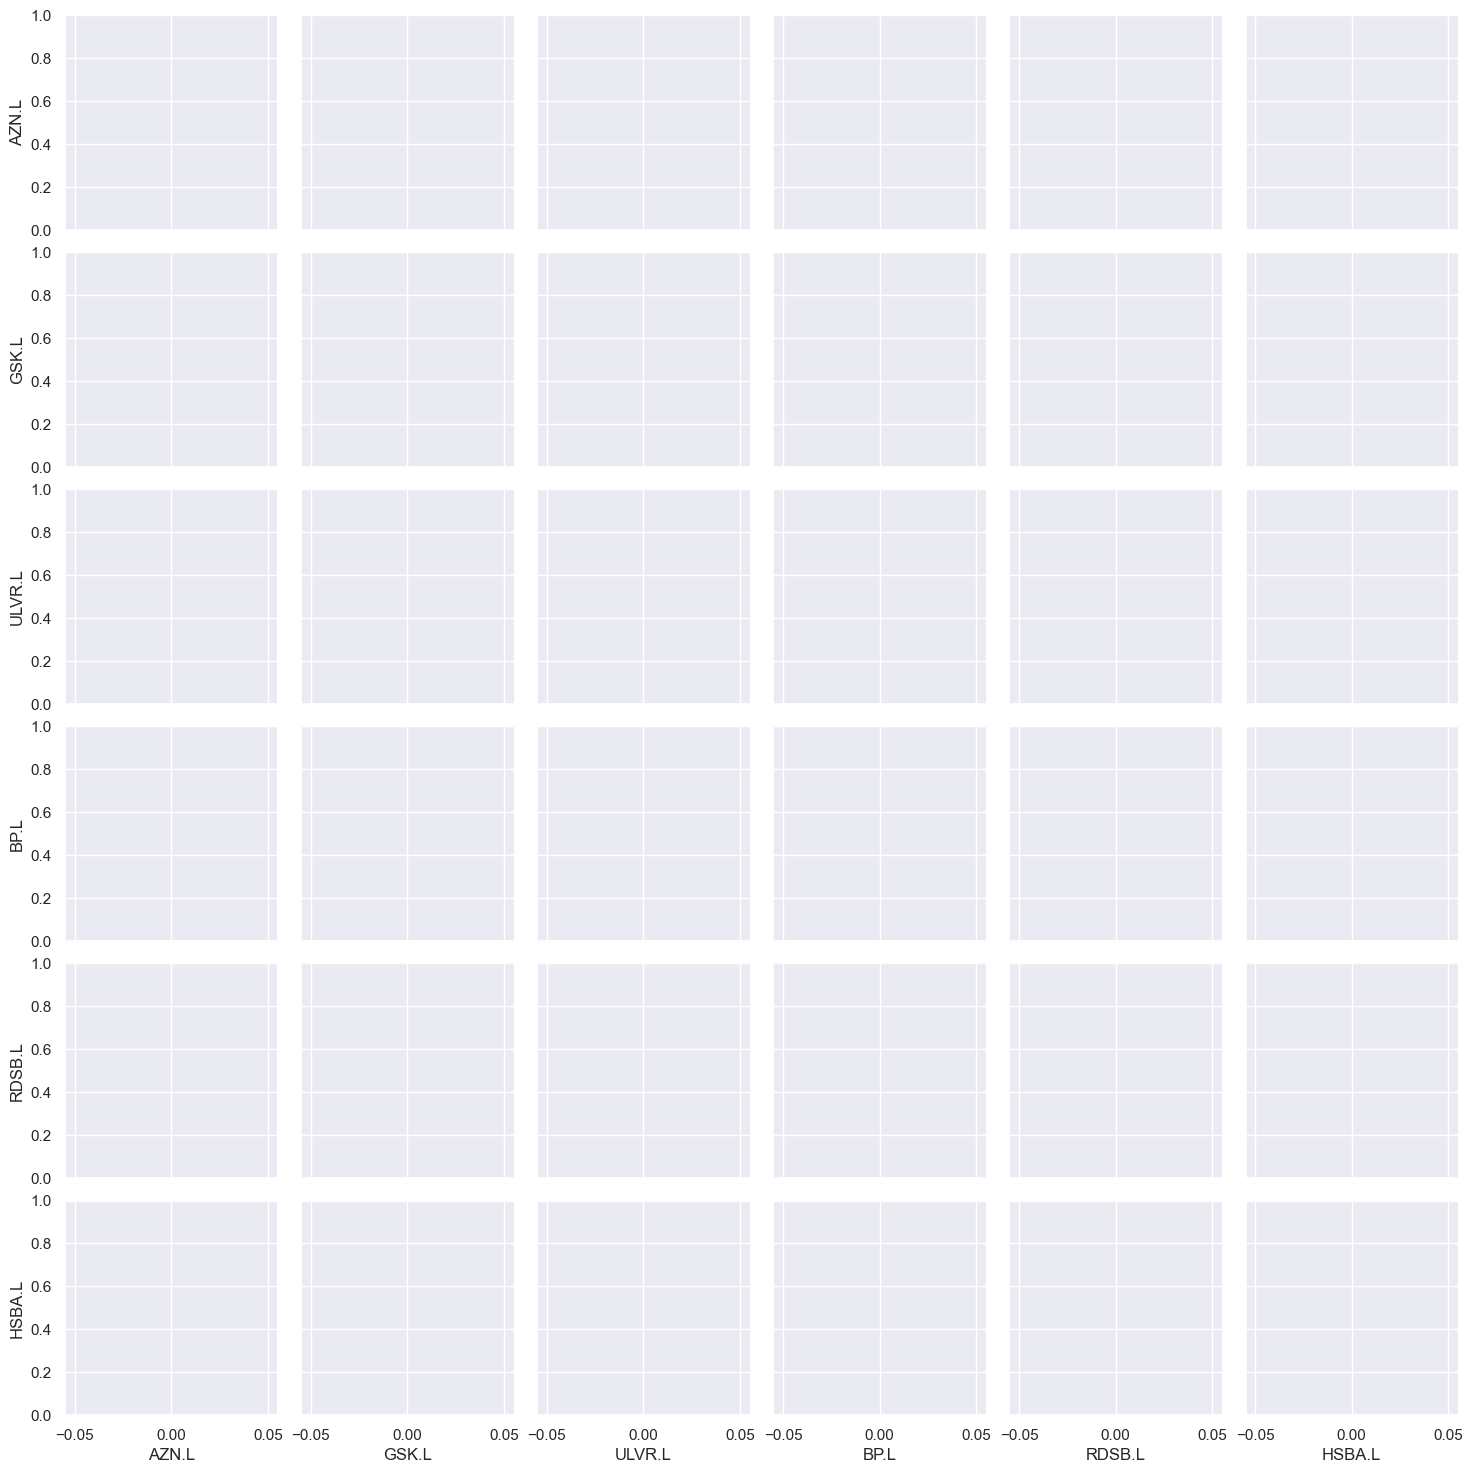

In [ ]:
# Pairplot of returns dataframe 

sns.pairplot(returns);

### 7.2 Box plots

Box and whisker plots are a standardised way of displaying the distribution of data based on a five number summary (minimum, first quartile (Q1), median, third quartile (Q3), and maximum), with a line going through the box at the median. 



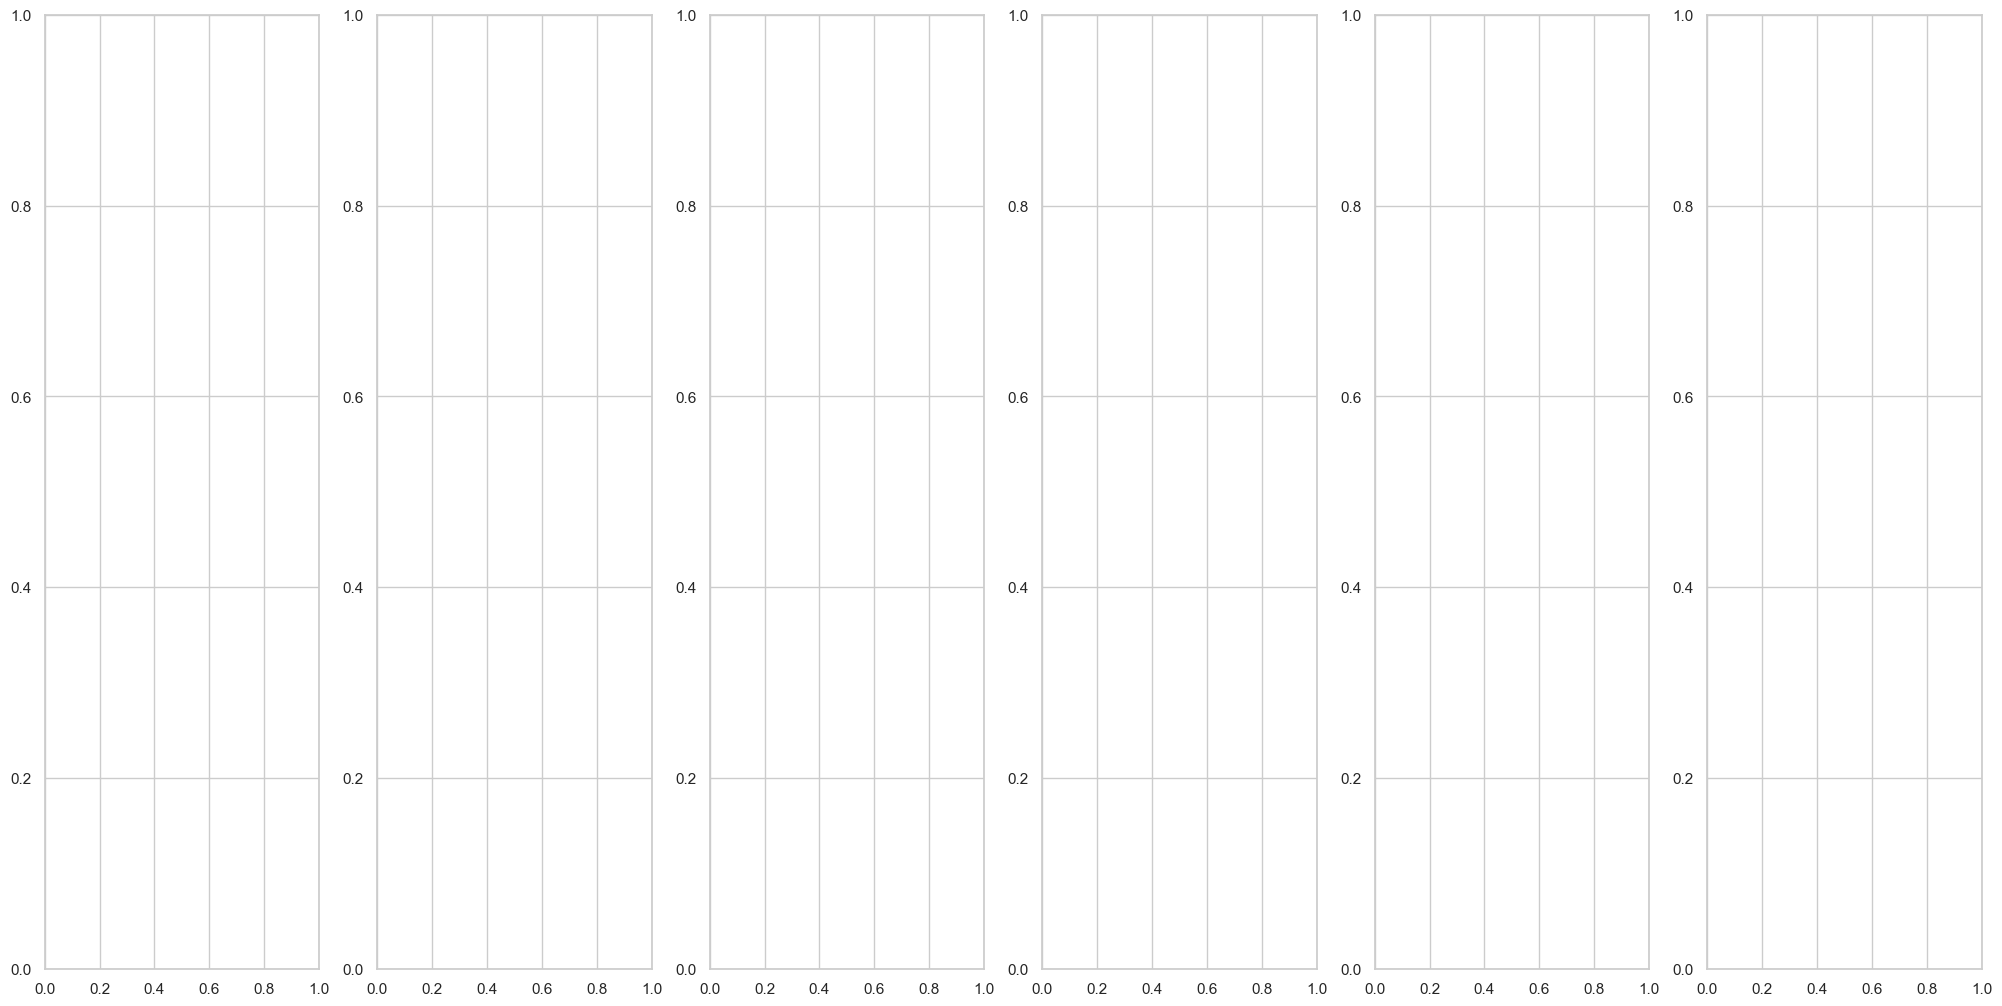

In [ ]:
# Boxplots showing distribution of the returns data over the time period 

sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=6, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in returns.items():
    sns.boxplot(y=k, data=returns, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

By comparing the interquartile ranges (box lengths), we can compare dispersion. If two boxes do not overlap with one another then there is a difference between the two groups. We can see that AZN.L and ULVR. do not overlap with the other stocks.

If we compare the respective medians and the median line of one box lies outside of another entirely, then there is likely to be a difference between the two groups. Again we can see that AZN.L and ULVR. are different.

Whiskers show how big a range there is between maximum and minimum values, with larger ranges indicating wider distribution, that is, more scattered data.

We can look for signs of skewness suggesting that data may not be normally distributed. Skewed data show a lopsided box plot, where the median cuts the box into two unequal pieces. If the longer part of the box is above the median, the data is said to be positively skewed. If the longer part is or below the median, the data is negatively skewed.

Any values in the data set that are more extreme than the adjacent values are plotted as separate points on the box plot. This identifies them as potential outliers.


### 7.3 Distribution plots

Distribution plots depict the variation in the data distribution. Here the distribution of returns is shown by a histogram and a line in combination with it which is the kernel density estimate.

C:\Users\abhis\AppData\Local\Temp\ipykernel_5304\1244761038.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2019-01-01':'2019-12-31'][ticker], color='green', bins=100, ax=axs[index])
c:\Users\abhis\Downloads\Stock-Prediction-main\Stock-Prediction-main\.venv\Lib\site-packages\numpy\lib\_histograms_impl.py:897: RuntimeWarning: invalid value encountered in divide
  return n / db / n.sum(), bin_edges
C:\Users\abhis\AppData\Local\Temp\ipykernel_5304\1244761038.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function

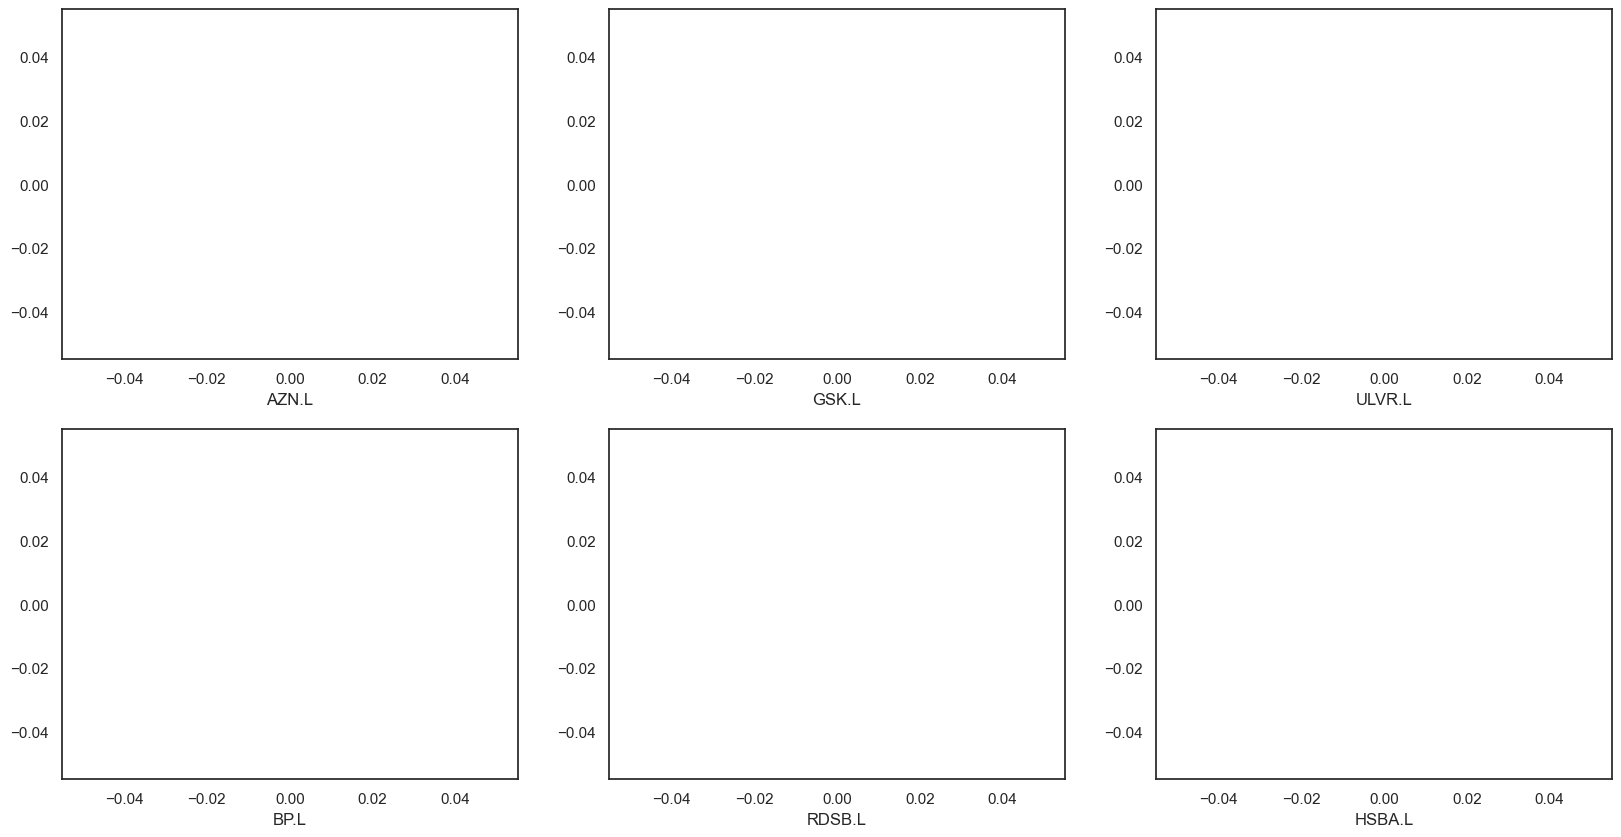

In [ ]:
# Distribution plots showing the data for returns for 2019 

sns.set_style("white")

tickers = ['AZN.L', 'GSK.L', 'ULVR.L', 'BP.L', 'RDSB.L', 'HSBA.L']
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for ticker in tickers:
    sns.distplot(returns.loc['2019-01-01':'2019-12-31'][ticker], color='green', bins=100, ax=axs[index])
    index += 1

### 7.4 Covariance

Covariance indicates the **direction** of the linear relationship between variables. It is a measure of the relationship between two stocks' returns and can help determine if stocks' returns tend to move with or against each other. 

Investors might even be able to select stocks that complement each other in terms of price movement. This can help reduce the overall risk and increase the overall potential return of a portfolio.

In [ ]:
# Covariance matrix to show direction of relationship between stocks' returns

returns.cov() 

c:\Users\abhis\Downloads\Stock-Prediction-main\Stock-Prediction-main\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:576: RuntimeWarning: Mean of empty slice
  avg = a.mean(axis, **keepdims_kw)
c:\Users\abhis\Downloads\Stock-Prediction-main\Stock-Prediction-main\.venv\Lib\site-packages\numpy\_core\_methods.py:134: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\Users\abhis\Downloads\Stock-Prediction-main\Stock-Prediction-main\.venv\Lib\site-packages\pandas\core\frame.py:11238: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
c:\Users\abhis\Downloads\Stock-Prediction-main\Stock-Prediction-main\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2888: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\abhis\Downloads\Stock-Prediction-main\Stock-Prediction-main\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2888: RuntimeWarning: invalid value encountered 

,AZN.L,GSK.L,ULVR.L,BP.L,RDSB.L,HSBA.L
AZN.L,NaN,NaN,NaN,NaN,NaN,NaN
GSK.L,NaN,NaN,NaN,NaN,NaN,NaN
ULVR.L,NaN,NaN,NaN,NaN,NaN,NaN
BP.L,NaN,NaN,NaN,NaN,NaN,NaN
RDSB.L,NaN,NaN,NaN,NaN,NaN,NaN
HSBA.L,NaN,NaN,NaN,NaN,NaN,NaN


### 7.5 Correlation

Correlation measures both the **strength and direction** of the linear relationship between two variables, or the degree to which two variables move in relation to each other, and is a function of the covariance.

In [ ]:
# Correlation matrix to show strength and direction of relationship between stocks' returns

returns.corr()

,AZN.L,GSK.L,ULVR.L,BP.L,RDSB.L,HSBA.L
AZN.L,NaN,NaN,NaN,NaN,NaN,NaN
GSK.L,NaN,NaN,NaN,NaN,NaN,NaN
ULVR.L,NaN,NaN,NaN,NaN,NaN,NaN
BP.L,NaN,NaN,NaN,NaN,NaN,NaN
RDSB.L,NaN,NaN,NaN,NaN,NaN,NaN
HSBA.L,NaN,NaN,NaN,NaN,NaN,NaN


c:\Users\abhis\Downloads\Stock-Prediction-main\Stock-Prediction-main\.venv\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)


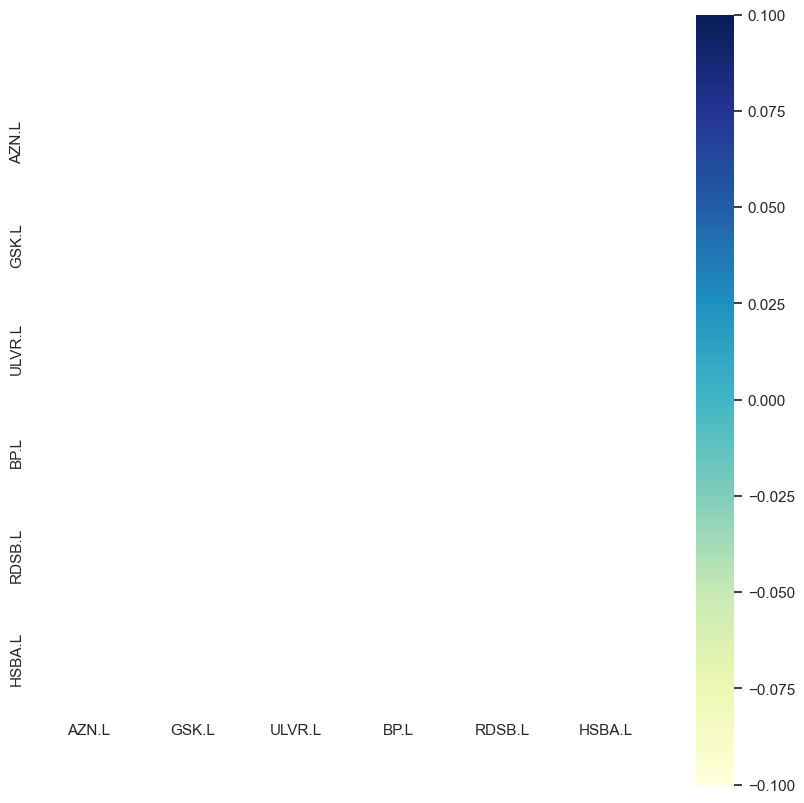

In [ ]:
# The heatmap clearly shows the strength of correlation between pairs of company returns

plt.figure(figsize=(10, 10))
sns.heatmap(data = returns.corr(), vmax=.8, linewidths=0.5,  fmt='.2f',
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.show()

The strongest correlation is between RDSB and BP (oil stocks) followed by GSK and AZN (pharmaceutical stocks).

## 8. FTSE 100 Index data

Finally, we will visualise data from the launch of the FTSE 100 Index in January 1984 to the end of 2020 as being representative of the UK stock market.  


In [ ]:
# Download FTSE 100 historical stock data from Yahoo! Finance for 1984-2020

ftse100_idx_to_2020 = yf.download("^FTSE", start=datetime.datetime(1984, 1, 1), 
                                     end=datetime.datetime(2021, 1, 1))
ftse100_idx_to_2020

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^FTSE,^FTSE,^FTSE,^FTSE,^FTSE
Date,,,,,
1984-01-03,997.500000,1001.400024,997.500000,997.500000,0
1984-01-04,998.599976,999.500000,993.299988,997.500000,0
1984-01-05,1015.799988,1015.799988,1007.099976,1007.099976,0
1984-01-06,1029.000000,1029.300049,1019.000000,1019.000000,0
1984-01-09,1034.599976,1035.400024,1030.599976,1030.599976,0
...,...,...,...,...,...
2020-12-23,6495.799805,6497.299805,6431.200195,6453.200195,807695400
2020-12-24,6502.100098,6530.299805,6479.600098,6495.799805,477470700


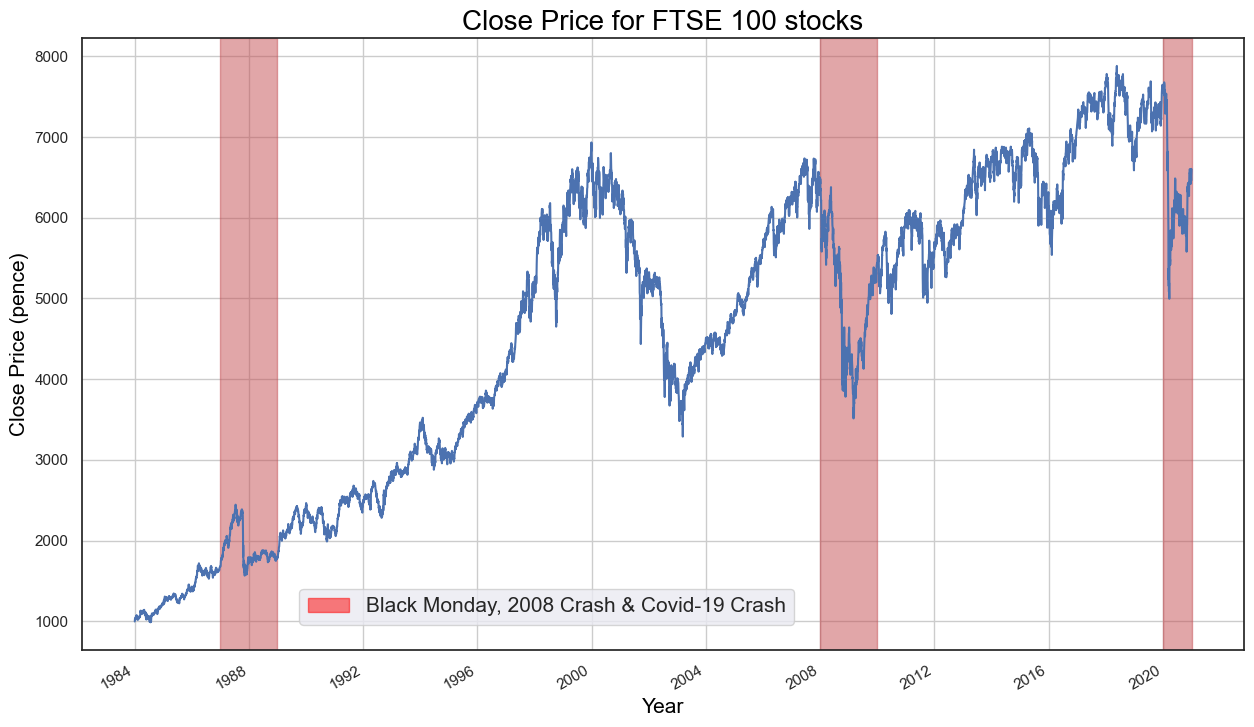

In [ ]:
def ftse100_to_2020_plot():
    ftse100_idx_to_2020['Close'].plot(grid = True)
    sns.set(rc={'figure.figsize':(20, 10)})
    plt.axvspan('1987','1989',color='r',alpha=.5)
    plt.axvspan('2008','2010',color='r',alpha=.5)
    plt.axvspan('2020','2021',color='r',alpha=.5)
    labs = mpatches.Patch(color='red',alpha=.5, label="Black Monday, 2008 Crash & Covid-19 Crash")
    plt.legend(handles=[labs], prop={"size":15},  bbox_to_anchor=(0.4, 0.1), loc='upper center', borderaxespad=0.)
    plt.title('Close Price for FTSE 100 stocks', color = 'black', fontsize = 20)
    plt.xlabel('Year', color = 'black', fontsize = 15)
    plt.ylabel('Close Price (pence)', color = 'black', fontsize = 15)
    plt.show();

ftse100_to_2020_plot()

The plot clearly shows the major market events of Black Monday in 1987, the 2008 Global Financial Crisis, and the Coronavirus Crash in 2020 and appears to confirm the overall upward trend of stocks from 2010-2019 evident in the selection of stocks analysed.